<a href="https://colab.research.google.com/github/SRINIVASDEVARAJULA/MP/blob/main/Rnn_10k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

     |████████████████████████████████| 411.5 MB 7.4 kB/s 
     |████████████████████████████████| 412.3 MB 28 kB/s 
     |████████████████████████████████| 240 kB 26.6 MB/s 
     |████████████████████████████████| 171 kB 25.8 MB/s 
     |████████████████████████████████| 3.8 MB 25.7 MB/s 
     |████████████████████████████████| 503 kB 44.4 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=c0f2a9734938f091f61f3e171e0c6be4f46fba884e1565e8fca966b59f87fbbb
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorb

In [4]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C
from stable_baselines import PPO2

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [5]:
df=pd.read_csv("/content/combinedSample_GoldDs.csv")

In [6]:
df=df[:10000]
df.shape

(10000, 11)

In [7]:
df["Open"]=(df["Open_Bid"]+df["Open_Ask"])/2
df["High"]=(df["High_Bid"]+df["High_Ask"])/2
df["Low"]=(df["Low_Bid"]+df["Low_Ask"])/2
df["Close"]=(df["Close_Bid"]+df["Close_Ask"])/2
df['Volume']=(df['Volume_Bid']+df['Volume_Ask'])/2

In [8]:
df['Local time']=df['Local time'].str[0:16]
df['Local time']

0       14.03.2021 22:00
1       14.03.2021 22:01
2       14.03.2021 22:02
3       14.03.2021 22:03
4       14.03.2021 22:04
              ...       
9995    23.03.2021 21:35
9996    23.03.2021 21:36
9997    23.03.2021 21:37
9998    23.03.2021 21:38
9999    23.03.2021 21:39
Name: Local time, Length: 10000, dtype: object

In [9]:
data=df.drop(['Open_Bid','High_Bid','Low_Bid','Close_Bid','Open_Ask','High_Ask','Low_Ask','Close_Ask'],axis=1)
data=data.drop(['Volume_Ask','Volume_Bid'],axis=1)

In [10]:
df=data

In [11]:
df['Local time'] = pd.to_datetime(df['Local time'])
df.dtypes

Local time    datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
dtype: object

In [12]:
df.set_index('Local time', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Local time,,,,,
2021-03-14 22:00:00,1727.4250,1729.6500,1727.3570,1728.8900,62942.00010
2021-03-14 22:01:00,1728.9735,1730.1210,1728.9285,1729.9145,76192.49820
2021-03-14 22:02:00,1729.9365,1730.4545,1729.8395,1730.3315,49075.00000
2021-03-14 22:03:00,1730.3265,1730.4645,1729.1980,1729.4530,31242.50005
2021-03-14 22:04:00,1729.4085,1729.6465,1728.5765,1728.9635,39795.00100


In [13]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,250), window_size=5)

In [14]:
env.signal_features

array([[ 1.7288900e+03,  0.0000000e+00],
       [ 1.7299145e+03,  1.0245000e+00],
       [ 1.7303315e+03,  4.1700000e-01],
       [ 1.7294530e+03, -8.7850000e-01],
       [ 1.7289635e+03, -4.8950000e-01],
       [ 1.7264915e+03, -2.4720000e+00],
       [ 1.7263400e+03, -1.5150000e-01],
       [ 1.7259020e+03, -4.3800000e-01],
       [ 1.7263535e+03,  4.5150000e-01],
       [ 1.7275135e+03,  1.1600000e+00],
       [ 1.7274955e+03, -1.8000000e-02],
       [ 1.7268305e+03, -6.6500000e-01],
       [ 1.7268735e+03,  4.3000000e-02],
       [ 1.7275720e+03,  6.9850000e-01],
       [ 1.7274350e+03, -1.3700000e-01],
       [ 1.7272570e+03, -1.7800000e-01],
       [ 1.7275735e+03,  3.1650000e-01],
       [ 1.7271785e+03, -3.9500000e-01],
       [ 1.7274200e+03,  2.4150000e-01],
       [ 1.7272085e+03, -2.1150000e-01],
       [ 1.7273835e+03,  1.7500000e-01],
       [ 1.7275300e+03,  1.4650000e-01],
       [ 1.7274135e+03, -1.1650000e-01],
       [ 1.7273285e+03, -8.5000000e-02],
       [ 1.72607

In [15]:
env.action_space

Discrete(2)

info {'total_reward': 4.986499999999523, 'total_profit': 0.3767388642010038, 'position': 1}


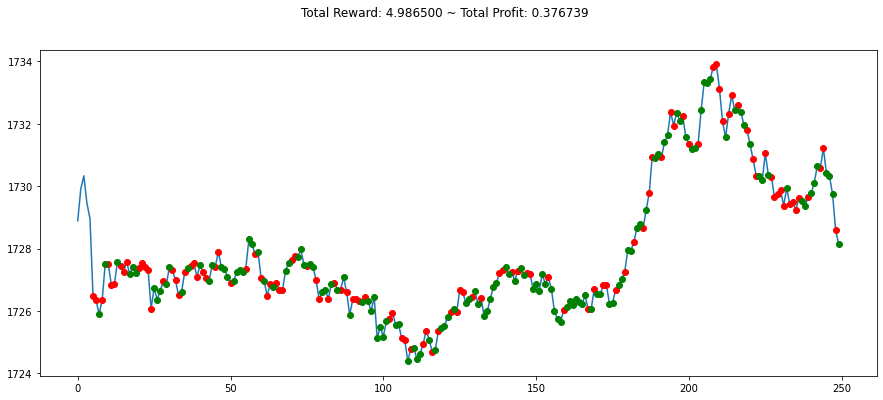

In [16]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [17]:
!pip install finta

In [18]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [19]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [20]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [21]:
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Local time,,,,,,,,
2021-03-14 22:00:00,1727.4250,1729.6500,1727.3570,1728.8900,62942.00010,0.000000,0.000000,0.00000
2021-03-14 22:01:00,1728.9735,1730.1210,1728.9285,1729.9145,76192.49820,0.000000,100.000000,76192.49820
2021-03-14 22:02:00,1729.9365,1730.4545,1729.8395,1730.3315,49075.00000,0.000000,100.000000,125267.49820
2021-03-14 22:03:00,1730.3265,1730.4645,1729.1980,1729.4530,31242.50005,0.000000,59.122122,94024.99815
2021-03-14 22:04:00,1729.4085,1729.6465,1728.5765,1728.9635,39795.00100,0.000000,47.476501,54229.99715
2021-03-14 22:05:00,1728.9265,1728.9265,1726.3815,1726.4915,62565.00075,0.000000,22.921605,-8335.00360
2021-03-14 22:06:00,1726.5065,1726.6705,1726.1300,1726.3400,44684.99870,0.000000,22.164988,-53020.00230
2021-03-14 22:07:00,1726.3600,1726.4635,1725.8885,1725.9020,39854.99965,0.000000,20.099330,-92875.00195
2021-03-14 22:08:00,1725.9035,1726.7470,1725.8850,1726.3535,38402.50055,0.000000,27.590581,-54472.50140


In [22]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Local time,,,,,,,,
2021-03-14 22:00:00,1727.4250,1729.6500,1727.3570,1728.8900,62942.00010,0.0,0.000000,0.00000
2021-03-14 22:01:00,1728.9735,1730.1210,1728.9285,1729.9145,76192.49820,0.0,100.000000,76192.49820
2021-03-14 22:02:00,1729.9365,1730.4545,1729.8395,1730.3315,49075.00000,0.0,100.000000,125267.49820
2021-03-14 22:03:00,1730.3265,1730.4645,1729.1980,1729.4530,31242.50005,0.0,59.122122,94024.99815
2021-03-14 22:04:00,1729.4085,1729.6465,1728.5765,1728.9635,39795.00100,0.0,47.476501,54229.99715


In [23]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [24]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,50))

In [25]:
env2.signal_features

array([[ 1.72735700e+03,  6.29420001e+04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.72892850e+03,  7.61924982e+04,  0.00000000e+00,
         1.00000000e+02,  7.61924982e+04],
       [ 1.72983950e+03,  4.90750000e+04,  0.00000000e+00,
         1.00000000e+02,  1.25267498e+05],
       [ 1.72919800e+03,  3.12425001e+04,  0.00000000e+00,
         5.91221225e+01,  9.40249981e+04],
       [ 1.72857650e+03,  3.97950010e+04,  0.00000000e+00,
         4.74765013e+01,  5.42299971e+04],
       [ 1.72638150e+03,  6.25650007e+04,  0.00000000e+00,
         2.29216046e+01, -8.33500360e+03],
       [ 1.72613000e+03,  4.46849987e+04,  0.00000000e+00,
         2.21649882e+01, -5.30200023e+04],
       [ 1.72588850e+03,  3.98549996e+04,  0.00000000e+00,
         2.00993299e+01, -9.28750020e+04],
       [ 1.72588500e+03,  3.84025005e+04,  0.00000000e+00,
         2.75905812e+01, -5.44725014e+04],
       [ 1.72634350e+03,  3.97425005e+04,  0.00000000e+00,
         4.25053438e+01

In [26]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Local time,,,,,,,,
2021-03-14 22:00:00,1727.4250,1729.6500,1727.3570,1728.8900,62942.00010,0.0,0.000000,0.00000
2021-03-14 22:01:00,1728.9735,1730.1210,1728.9285,1729.9145,76192.49820,0.0,100.000000,76192.49820
2021-03-14 22:02:00,1729.9365,1730.4545,1729.8395,1730.3315,49075.00000,0.0,100.000000,125267.49820
2021-03-14 22:03:00,1730.3265,1730.4645,1729.1980,1729.4530,31242.50005,0.0,59.122122,94024.99815
2021-03-14 22:04:00,1729.4085,1729.6465,1728.5765,1728.9635,39795.00100,0.0,47.476501,54229.99715


In [27]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [28]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

Streaming output truncated to the last 5000 lines.
---------------------------------
| explained_variance | 0.999    |
| fps                | 282      |
| nupdates           | 137600   |
| policy_entropy     | 0.00629  |
| total_timesteps    | 688000   |
| value_loss         | 2.23e-05 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 282      |
| nupdates           | 137700   |
| policy_entropy     | 0.147    |
| total_timesteps    | 688500   |
| value_loss         | 9.18e-05 |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 282      |
| nupdates           | 137800   |
| policy_entropy     | 0.00208  |
| total_timesteps    | 689000   |
| value_loss         | 5.46e-05 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 282      |
| nupdates           | 137900  

In [29]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(80,250))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 4.347500000000309, 'total_profit': 0.7412025689376197, 'position': 1}


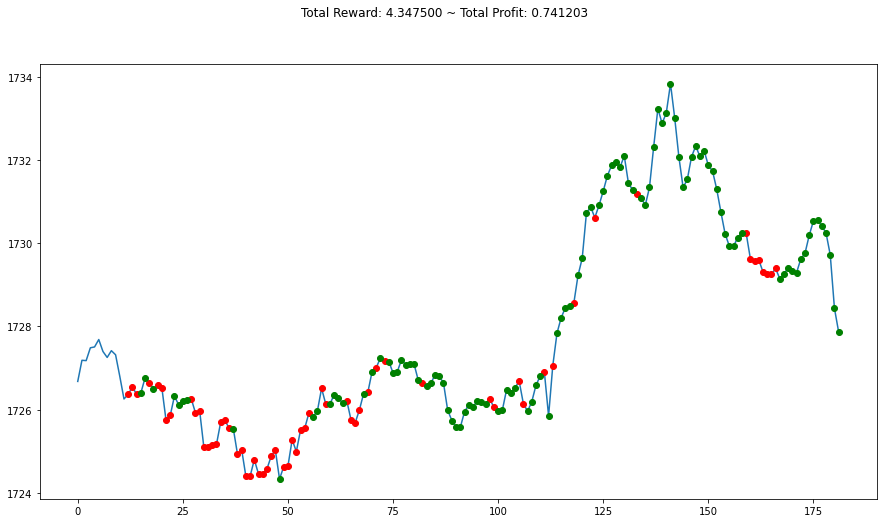

In [30]:
plt.figure(figsize=(15,8))
plt.cla()
env.render_all()
plt.show()